In [1]:
# Importing necessary libraries for data manipulation, visualization, and model building
import matplotlib.pyplot as plt  # For plotting graphs
from keras.layers import Dense, Flatten  # For creating neural network layers
from keras.models import Sequential  # For creating a sequential model
from keras.utils import to_categorical  # For converting labels to one-hot encoding
from keras.datasets import mnist  # For importing the MNIST dataset
from keras import utils  # For various utility functions


import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the Fashion MNIST dataset, which is a dataset of bodywear accessories
from keras.datasets import fashion_mnist

# Load the MNIST dataset, which is a dataset of bodywear accessories
# x_train and y_train are the training data and labels respectively
# x_test and y_test are the testing data and labels respectively
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
# Display the shape of the y_test array
# y_test is the array containing the labels for the test dataset
# The shape attribute returns a tuple representing the dimensions of the array
# This is useful for understanding the structure and size of the test labels
print(y_test.shape)

(10000,)


In [6]:
# Display the shape of the x_train array
# x_train is the array containing the training data (images of bodywear accessories)
# The shape attribute returns a tuple representing the dimensions of the array
# This helps to understand the number of training samples and their dimensions
print(x_train.shape)

(60000, 28, 28)


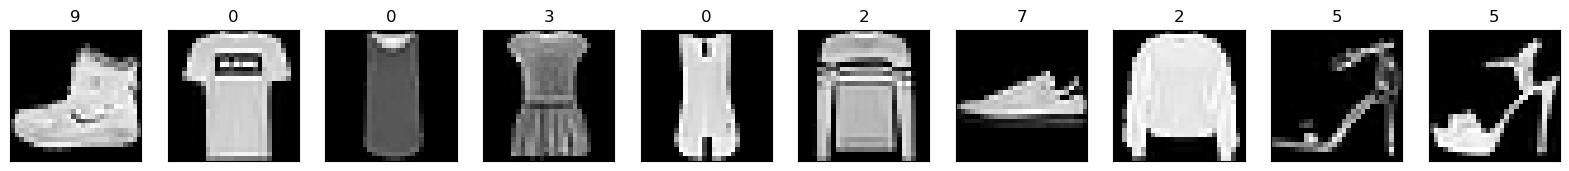

In [7]:
# Let's plot the first 10 images from the training dataset
# Create a figure and an array of subplots
# ncols=10: Specifies the number of columns in the subplot grid (10 columns)
# sharex=False: Determines whether the x-axis is shared among subplots (not shared)
# sharey=True: Determines whether the y-axis is shared among subplots (shared)
# figsize=(20, 4): Specifies the width and height of the figure in inches (20 inches wide, 4 inches tall)
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))
# Loop through the first 10 images
for i in range(10):
    # Set the title of each subplot to the corresponding label in y_train
    axes[i].set_title(y_train[i])
    # Display each image in grayscale
    axes[i].imshow(x_train[i], cmap='gray')
    # Hide the x-axis
    axes[i].get_xaxis().set_visible(False)
    # Hide the y-axis
    axes[i].get_yaxis().set_visible(False)

# Show the plot
plt.show()

In [8]:
# Let's convert the labels to categorical format
# This code converts the labels into a one-hot encoded format with 10 dimensions
# Each label will be represented as a binary vector of length 10
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
# Let's check how the labels look after converting to categorical format
print(y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
# Let's check the y_test labels to see how they look after conversion to categorical format
print(y_test)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
# Let's check the shape of the y_test array
# This provides information about the dimensions of the y_test array
print(y_test.shape)

(10000, 10)


In [42]:
# Define a Sequential model, which allows adding layers sequentially
model = Sequential()

# Add a Flatten layer to convert the 28x28 input images into a 1D array
# Input shape is set to (28, 28) representing the dimensions of the input images
model.add(Flatten(input_shape=(28, 28)))

# Add a Dense layer with 10 neurons and 'sigmoid' activation function
model.add(Dense(10, activation='relu'))

# Add another Dense layer with 5 neurons and 'sigmoid' activation function
model.add(Dense(10, activation='relu'))

# Add the output layer with 10 neurons (one for each class) and 'softmax' activation function
# Softmax is used for multi-class classification to output probabilities for each class
model.add(Dense(10, activation='softmax'))

In [43]:
# Display a summary of the model architecture, including the number of parameters in each layer
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,070 (31.52 KB)

 Trainable params: 8,070 (31.52 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Compile the model with categorical crossentropy loss, Adam optimizer, and precision metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['precision'])

In [45]:
# Train the model for one epoch on the training data and validate on the test data, storing the training history
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 3.7520 - precision: 0.5678 - val_loss: 1.6000 - val_precision: 0.7590
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.4758 - precision: 0.7757 - val_loss: 1.2125 - val_precision: 0.9127
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.1775 - precision: 0.7981 - val_loss: 1.1948 - val_precision: 0.8236
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.1315 - precision: 0.7512 - val_loss: 1.1404 - val_precision: 0.7709
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.1099 - precision: 0.7244 - val_loss: 1.1310 - val_precision: 0.6613
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.0854 - precision: 0.7273 - val_loss: 1.0999 - val_precision: 0.7364
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.0843 - precision: 0.7290 - val_loss: 1.0956 - val_precision: 0.7134
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.0765 - preci

In [46]:
# Saving the trained model to a file named 'fashion_mnist_models_scifor.h5'
model.save('fashion_mnist_models_scifor.keras')

In [47]:
# Printing the training history containing the loss and accuracy metrics
print(history.history)

{'loss': [2.1100337505340576, 1.3648606538772583, 1.1622482538223267, 1.1219332218170166, 1.1064815521240234, 1.089587688446045, 1.0812431573867798, 1.0746848583221436, 1.0555636882781982, 1.036082148551941], 'precision': [0.6836216449737549, 0.8013164401054382, 0.7777420282363892, 0.7444846630096436, 0.7255618572235107, 0.7260211706161499, 0.7249571084976196, 0.7439131736755371, 0.7668383717536926, 0.7801656126976013], 'val_loss': [1.600021243095398, 1.2125413417816162, 1.1948171854019165, 1.1403735876083374, 1.1310157775878906, 1.0999207496643066, 1.0955730676651, 1.098833441734314, 1.0519368648529053, 1.0584200620651245], 'val_precision': [0.7589605450630188, 0.912715494632721, 0.8236086368560791, 0.7709113359451294, 0.661316990852356, 0.7363979816436768, 0.7134394645690918, 0.7410028576850891, 0.7956333756446838, 0.7656675577163696]}


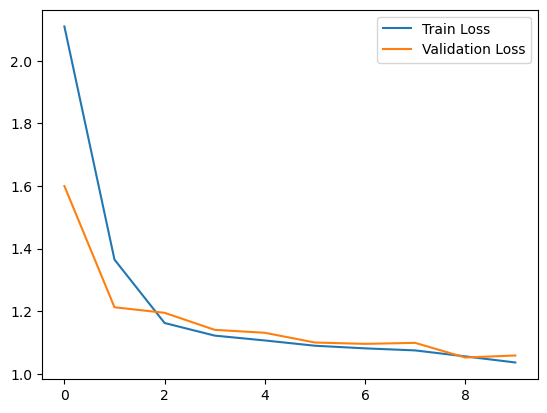

In [48]:
# Plotting the training loss curve
plt.plot(history.history['loss'], label='Train Loss')

# Plotting the validation loss curve
plt.plot(history.history['val_loss'], label='Validation Loss')

# Adding legend to the plot
plt.legend()

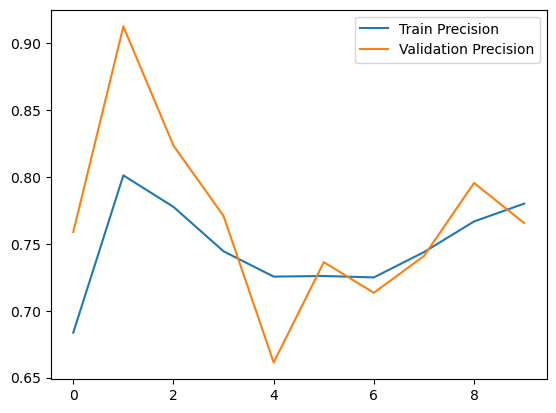

In [49]:
# Plotting the training accuracy curve
plt.plot(history.history['precision'], label='Train Precision')

# Plotting the validation accuracy curve
plt.plot(history.history['val_precision'], label='Validation Precision')

# Adding legend to the plot
plt.legend()

In [50]:
# Importing TensorFlow library
import tensorflow as tf

In [51]:
# Loading the pre-trained model from the file 'fashion_mnist_models_scifor.keras'
model = tf.keras.models.load_model('fashion_mnist_models_scifor.keras')

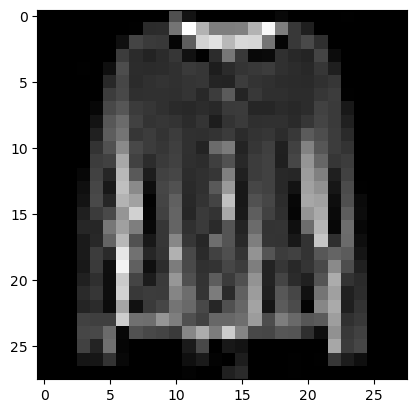

In [52]:
# Displaying the first test image from the dataset
plt.imshow(x_test[25], cmap='gray')

In [53]:
# Importing the NumPy library
import numpy as np

# Reshaping the first test image to match the model's input shape
x = np.reshape(x_test[25], (1, 28, 28))

# Using the trained model to predict the class label for the input image
predicted_label = np.argmax(model.predict(x))

# Printing the predicted class label
print(predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
2
